<a href="https://colab.research.google.com/github/williamvalenciaK/SQLServerPIT/blob/main/Clases/Sesi%C3%B3n_3_Consultas_a_m%C3%A1s_de_una_tabla_y_subconsultas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

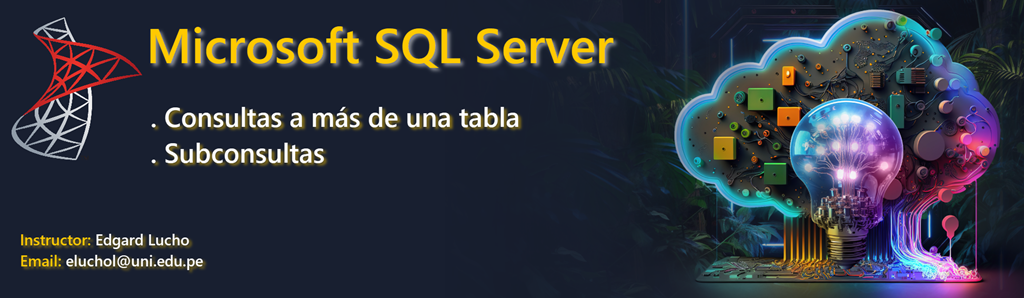



```
USE master
GO
IF EXISTS
(
	SELECT name
	FROM sysdatabases
	WHERE name = 'ConsultasComplejas'
)
DROP DATABASE ConsultasComplejas
GO
CREATE DATABASE ConsultasComplejas
ON PRIMARY
(
	name = ConsultasComplejasdat,
	filename = 'C:\DB\ConsultasComplejas_dat.mdf',
	size = 30MB,
	maxsize = 50MB,
	filegrowth = 10MB
)
LOG ON
(
	name = ConsultasComplejas_log,
	filename = 'C:\DB\ConsultasComplejas_log.ldf',
	size = 10MB,
	maxsize = UNLIMITED,
	filegrowth = 10%
)
GO
```





```
USE ConsultasComplejas
GO
IF EXISTS
(
	SELECT name
	FROM sys.tables
	WHERE name = 'departamento'
)
DROP TABLE departamento
GO
IF EXISTS
(
	SELECT name
	FROM sys.tables
	WHERE name = 'empleado'
)
DROP TABLE empleado
GO
CREATE TABLE departamento
(
	cod_dep_in	INT IDENTITY(1,1) NOT NULL,
	nom_dep_vc VARCHAR(20) NOT NULL
)
GO
CREATE TABLE empleado
(
	cod_emp_in	INT IDENTITY(1,1) NOT NULL,
	nom_emp_vc VARCHAR(20) NOT NULL,
	cod_dep_in	INT NULL,
)
GO
INSERT INTO departamento
VALUES
('Ventas'),
('Almacen'),
('Facturación'),
('Cobranzas'),
('Compras'),
('Personal'),
('Transportes'),
('Sistemas')
GO
INSERT INTO empleado
VALUES
('JORGE', 1),
('LUIS', 1),
('JULIO', 1),
('MARÍA', 2),
('CARLOS', 3),
('TEREZA', 4),
('HUGO', 99),
('Silvia', 99)
GO
SELECT * FROM departamento
GO
SELECT * FROM empleado
GO
```



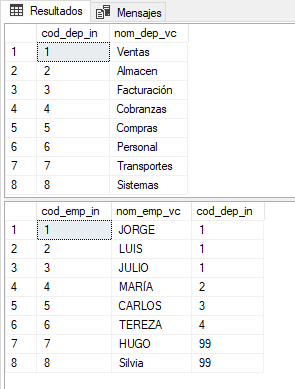

<table width='99%'>
<tr>
<td bgcolor='#52008E'>

# **<font color="#FFFFFF"> ◉ Consultas a más de una tabla</font>**

</td>
</tr>
</table>

<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#000000"> ◉ INNER JOIN</font>**

</td>
</tr>
</table>

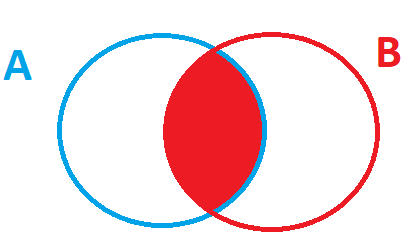



```
USE ConsultasComplejas
GO
SELECT *
FROM departamento AS d
INNER JOIN empleado AS e
ON d.cod_dep_in = e.cod_dep_in
GO
```





```
USE ConsultasComplejas
GO
SELECT *
FROM departamento d
INNER JOIN empleado e
ON d.cod_dep_in = e.cod_dep_in
GO
```



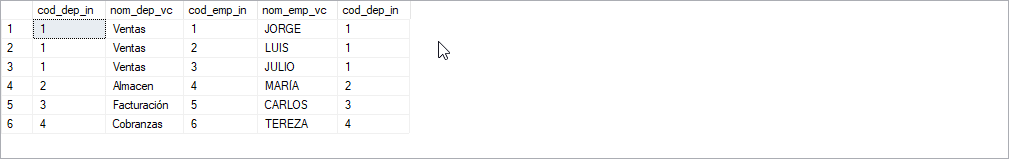

<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#000000"> ◉ LEFT OUTER JOIN</font>**

</td>
</tr>
</table>

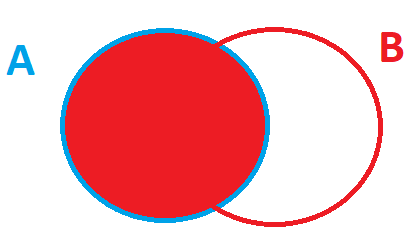



```
USE ConsultasComplejas
GO
SELECT *
FROM departamento d
LEFT OUTER JOIN empleado e
ON d.cod_dep_in = e.cod_dep_in
GO
```





```
USE ConsultasComplejas
GO
SELECT *
FROM departamento d
LEFT JOIN empleado e
ON d.cod_dep_in = e.cod_dep_in
GO
```



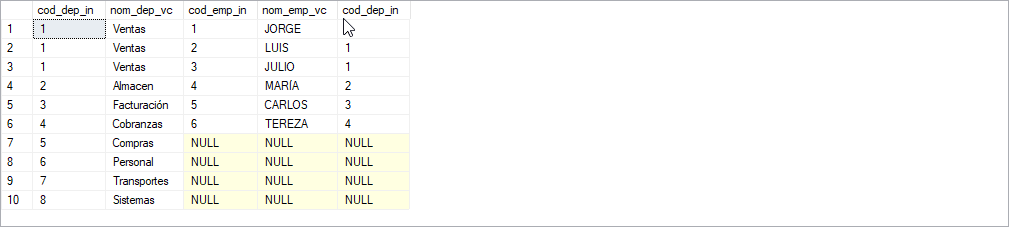

<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#000000"> ◉ RIGHT OUTER JOIN</font>**

</td>
</tr>
</table>

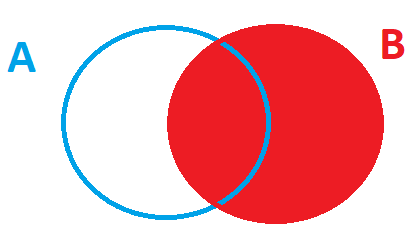



```
USE ConsultasComplejas
GO
SELECT *
FROM departamento d
RIGHT JOIN empleado e
ON d.cod_dep_in = e.cod_dep_in
GO
```



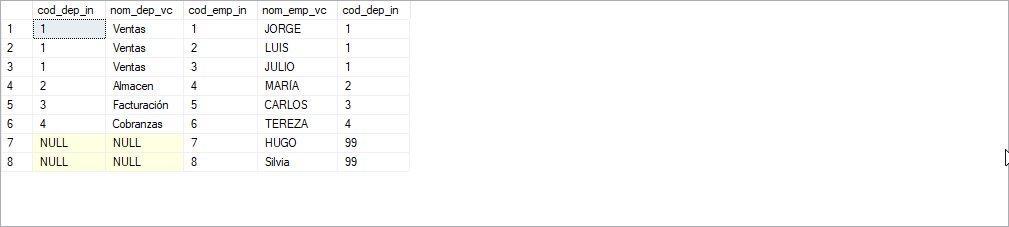

<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#000000"> ◉ FULL OUTER JOIN</font>**

</td>
</tr>
</table>

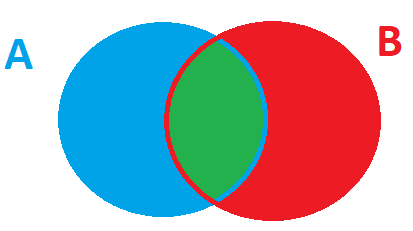



```
USE ConsultasComplejas
GO
SELECT *
FROM departamento d
FULL JOIN empleado e
ON d.cod_dep_in = e.cod_dep_in
GO
```



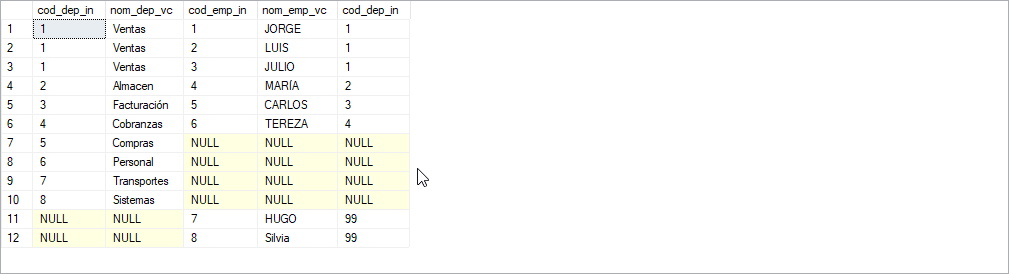

<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#000000"> ◉ Anticombinación izquierda</font>**

</td>
</tr>
</table>

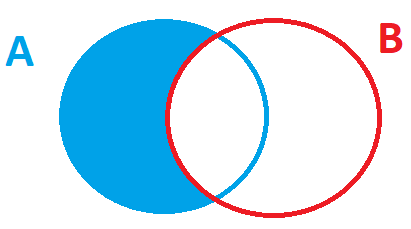



```
USE ConsultasComplejas
GO
SELECT *
FROM departamento d
LEFT JOIN empleado e
ON d.cod_dep_in = e.cod_dep_in
WHERE cod_emp_in IS NULL
GO
```



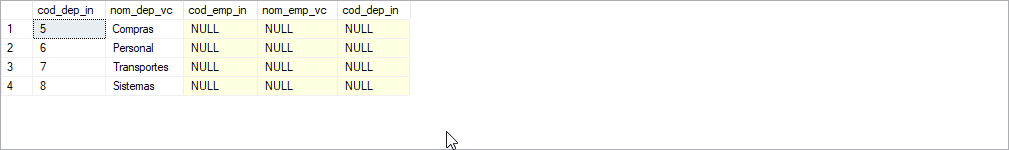



```
USE ConsultasComplejas
GO
SELECT d.*
FROM departamento d
LEFT JOIN empleado e
ON d.cod_dep_in = e.cod_dep_in
WHERE cod_emp_in IS NULL
GO
```



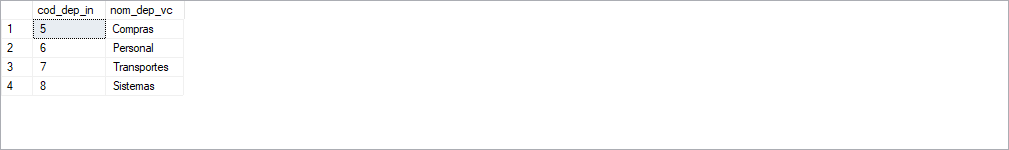

<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#000000"> ◉ Anticombinación derecha</font>**

</td>
</tr>
</table>

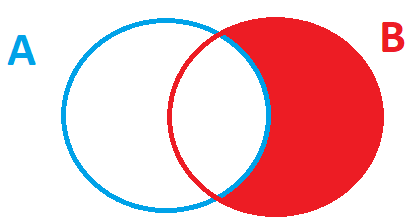



```
USE ConsultasComplejas
GO
SELECT *
FROM departamento d
RIGHT JOIN empleado e
ON d.cod_dep_in = e.cod_dep_in
WHERE d.cod_dep_in IS NULL
GO
```



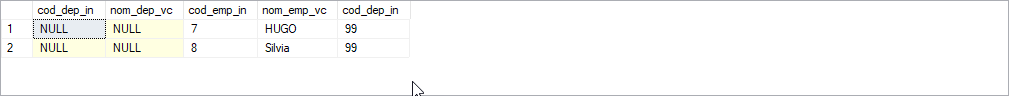



```
USE ConsultasComplejas
GO
SELECT e.*
FROM departamento d
RIGHT JOIN empleado e
ON d.cod_dep_in = e.cod_dep_in
WHERE d.cod_dep_in IS NULL
GO
```



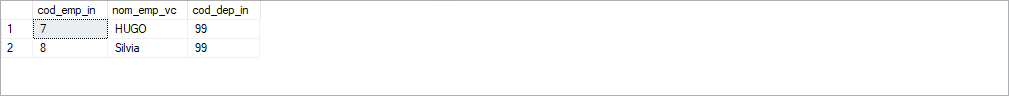

<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#000000"> ◉ Anticombinación externa completa</font>**

</td>
</tr>
</table>

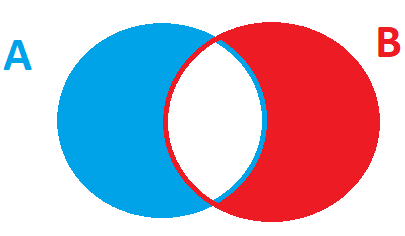



```
USE ConsultasComplejas
GO
SELECT *
FROM departamento d
FULL JOIN empleado e
ON d.cod_dep_in = e.cod_dep_in
WHERE
		e.cod_emp_in IS NULL
	OR
		d.cod_dep_in IS NULL
GO
```



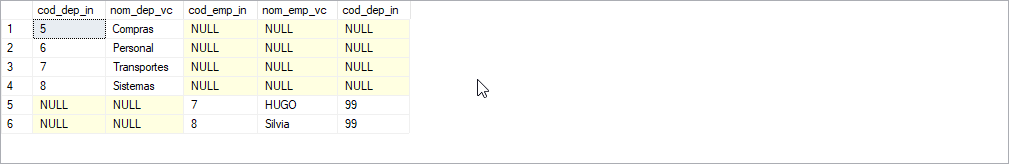

<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#000000"> ◉ CROSS JOIN</font>**

</td>
</tr>
</table>

El **CROSS JOIN** es un tipo de operación de unión (join) que genera un producto cartesiano entre dos conjuntos de datos.

Esto significa que se combinan todas las filas de una tabla con todas las filas de otra tabla, generando una nueva tabla con todas las posibles combinaciones.

Desde un punto de vista matemático, el CROSS JOIN entre dos tablas A y B genera una nueva tabla C donde cada fila de C es la combinación de una fila de A y una fila de B.

Si A tiene m filas y B tiene n filas, entonces la tabla resultante C tendrá m * n filas.



```
USE ConsultasComplejas
GO
SELECT *
FROM departamento
CROSS JOIN empleado
ORDER BY 1
GO
```





```
cod_dep_in	nom_dep_vc	cod_emp_in	nom_emp_vc	cod_dep_in
1	Ventas	1	JORGE	1
1	Ventas	2	LUIS	1
1	Ventas	3	JULIO	1
1	Ventas	4	MARÍA	2
1	Ventas	5	CARLOS	3
1	Ventas	6	TEREZA	4
1	Ventas	7	HUGO	99
1	Ventas	8	Silvia	99
2	Almacen	1	JORGE	1
2	Almacen	2	LUIS	1
2	Almacen	3	JULIO	1
2	Almacen	4	MARÍA	2
2	Almacen	5	CARLOS	3
2	Almacen	6	TEREZA	4
2	Almacen	7	HUGO	99
2	Almacen	8	Silvia	99
3	Facturación	1	JORGE	1
3	Facturación	2	LUIS	1
3	Facturación	3	JULIO	1
3	Facturación	4	MARÍA	2
3	Facturación	5	CARLOS	3
3	Facturación	6	TEREZA	4
3	Facturación	7	HUGO	99
3	Facturación	8	Silvia	99
4	Cobranzas	1	JORGE	1
4	Cobranzas	2	LUIS	1
4	Cobranzas	3	JULIO	1
4	Cobranzas	4	MARÍA	2
4	Cobranzas	5	CARLOS	3
4	Cobranzas	6	TEREZA	4
4	Cobranzas	7	HUGO	99
4	Cobranzas	8	Silvia	99
5	Compras	1	JORGE	1
5	Compras	2	LUIS	1
5	Compras	3	JULIO	1
5	Compras	4	MARÍA	2
5	Compras	5	CARLOS	3
5	Compras	6	TEREZA	4
5	Compras	7	HUGO	99
5	Compras	8	Silvia	99
6	Personal	1	JORGE	1
6	Personal	2	LUIS	1
6	Personal	3	JULIO	1
6	Personal	4	MARÍA	2
6	Personal	5	CARLOS	3
6	Personal	6	TEREZA	4
6	Personal	7	HUGO	99
6	Personal	8	Silvia	99
7	Transportes	1	JORGE	1
7	Transportes	2	LUIS	1
7	Transportes	3	JULIO	1
7	Transportes	4	MARÍA	2
7	Transportes	5	CARLOS	3
7	Transportes	6	TEREZA	4
7	Transportes	7	HUGO	99
7	Transportes	8	Silvia	99
8	Sistemas	1	JORGE	1
8	Sistemas	2	LUIS	1
8	Sistemas	3	JULIO	1
8	Sistemas	4	MARÍA	2
8	Sistemas	5	CARLOS	3
8	Sistemas	6	TEREZA	4
8	Sistemas	7	HUGO	99
8	Sistemas	8	Silvia	99
```



<table width='99%'>
<tr>
<td bgcolor='#BB2125'>

### **<font color="#FFFFFF"> ◉ Ejercicios de aplicación </font>**

</td>
</tr>
</table>

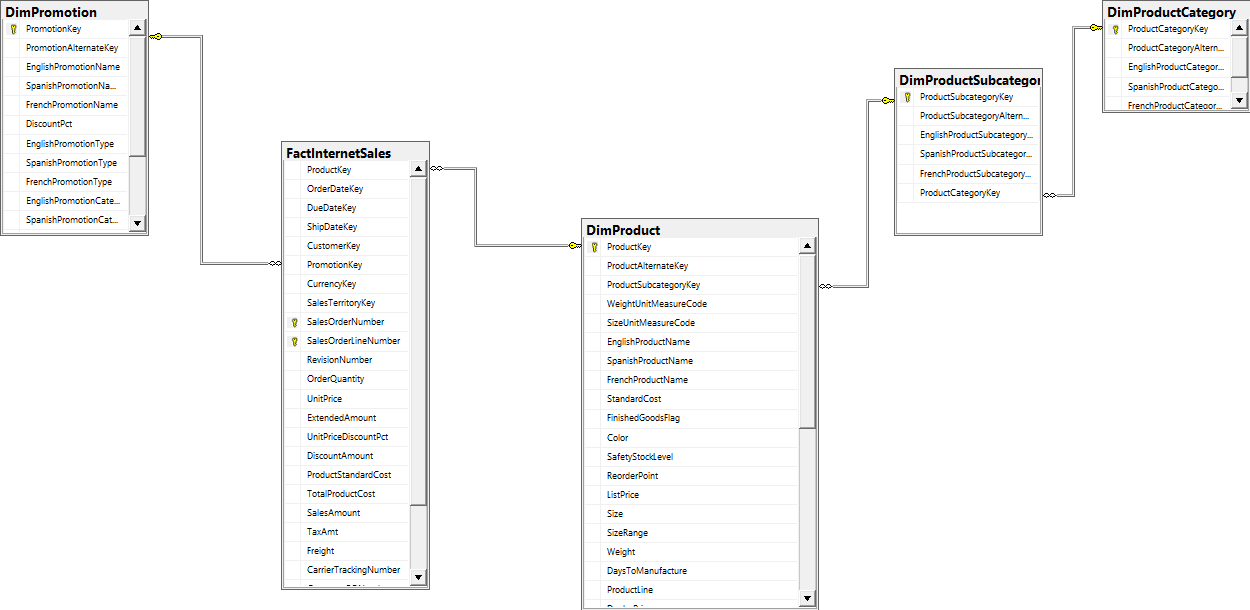



```
USE AdventureWorksDW2022
GO
SELECT
	c.SpanishProductCategoryName AS Categoría,
	CONVERT
	(
		DECIMAL(19,2),
		SUM
		(
			f.OrderQuantity*p.ListPrice *
			(
				1 -
				IIF
				(
					f.OrderDate>=pro.StartDate AND f.OrderDate <= pro.EndDate,
					pro.DiscountPct,
					0
				)
			)
		)
	) AS Monto
FROM DimProductCategory c
INNER JOIN DimProductSubcategory sc
ON c.ProductCategoryKey = sc.ProductCategoryKey
INNER JOIN DimProduct p
ON sc.ProductSubcategoryKey = p.ProductSubcategoryKey
INNER JOIN FactInternetSales f
ON p.ProductKey = f.ProductKey
INNER JOIN DimPromotion pro
ON pro.PromotionKey = f.PromotionKey
GROUP BY c.SpanishProductCategoryName
ORDER BY Monto DESC
```



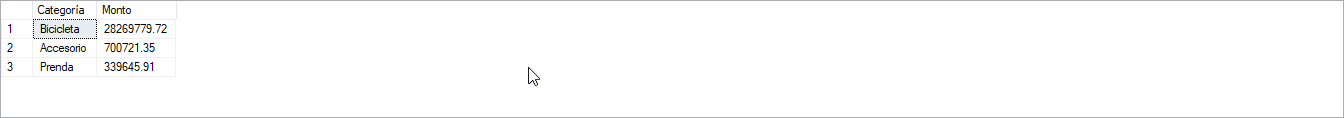

<table width='99%'>
<tr>
<td bgcolor='#52008E'>

# **<font color="#FFFFFF"> ◉ SubConsultas</font>**

</td>
</tr>
</table>

Las subconsultas en SQL Server son consultas anidadas dentro de otras consultas.

Estas consultas anidadas se utilizan para proporcionar datos adicionales que se utilizarán en la consulta principal.



```
USE Northwind
GO
SELECT AVG(UnitPrice) AS Promedio
FROM Products
GO
```



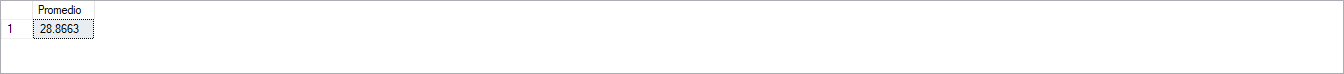

Mostrar todos los productos cuyo precio de venta es superior al precio promedio.



```
USE Northwind
GO
SELECT ProductID, ProductName, UnitPrice
FROM Products
WHERE
		UnitPrice >
		(
			SELECT AVG(UnitPrice) AS Promedio
			FROM Products
		)
ORDER BY UnitPrice
GO
```





```
ProductID	ProductName	UnitPrice
7	Uncle Bob's Organic Dried Pears	30.00
10	Ikura	31.00
26	Gumbär Gummibärchen	31.23
32	Mascarpone Fabioli	32.00
53	Perth Pasties	32.80
64	Wimmers gute Semmelknödel	33.25
60	Camembert Pierrot	34.00
72	Mozzarella di Giovanni	34.80
69	Gudbrandsdalsost	36.00
56	Gnocchi di nonna Alice	38.00
12	Queso Manchego La Pastora	38.00
17	Alice Mutton	39.00
8	Northwoods Cranberry Sauce	40.00
27	Schoggi Schokolade	43.90
63	Vegie-spread	43.90
28	Rössle Sauerkraut	45.60
43	Ipoh Coffee	46.00
62	Tarte au sucre	49.30
51	Manjimup Dried Apples	53.00
59	Raclette Courdavault	55.00
18	Carnarvon Tigers	62.50
20	Sir Rodney's Marmalade	81.00
9	Mishi Kobe Niku	97.00
29	Thüringer Rostbratwurst	123.79
38	Côte de Blaye	263.50
```

